In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
data = pd.read_csv("POS_vordlus_uus.csv")

In [3]:
data

,Mudel,Train_kadu,Val_kadu,Precision,Recall,F1,Accuracy,Epohh
0,100K,0.5414,0.364319,0.870019,0.866702,0.867207,0.866702,1
1,100K,0.2855,0.294419,0.894667,0.894326,0.893807,0.894326,2
2,100K,0.2034,0.277604,0.903588,0.903110,0.903084,0.903110,3
3,100K,NaN,NaN,0.910805,0.910328,0.910420,0.910328,test
4,300K,0.5757,0.378100,0.866366,0.863246,0.862973,0.863246,1
5,300K,0.3057,0.310189,0.889661,0.888830,0.888770,0.888830,2
6,300K,0.2349,0.279552,0.902618,0.901478,0.901782,0.901478,3
7,300K,NaN,NaN,0.905182,0.904433,0.904659,0.904433,test
8,500K,0.6190,0.393179,0.859552,0.857390,0.857416,0.857390,1
9,500K,0.3230,0.300883,0.890522,0.889742,0.889786,0.889742,2


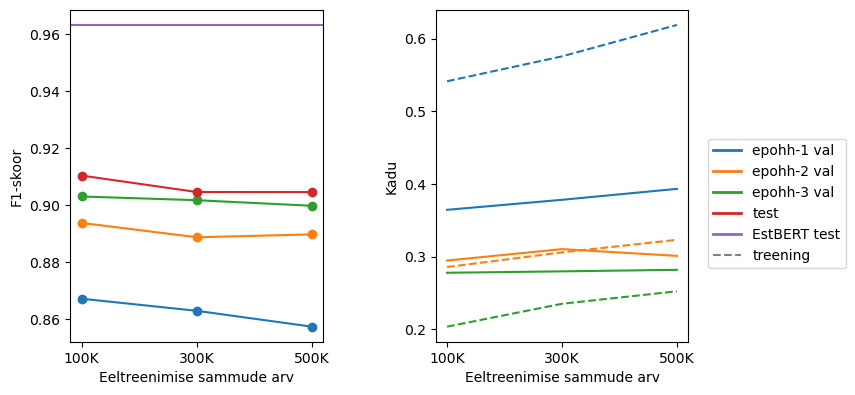

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
fig.tight_layout(pad=5.0)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'gray']

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax1.plot(epohh_data.Mudel, epohh_data.F1, label = epohh, marker='o', c = colors[i])

estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "test")]
ax1.axhline(y=float(estbert_data.F1), color='tab:purple', label = "EstBERT test")

ax1.set(xlabel="Eeltreenimise sammude arv", ylabel="F1-skoor")

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax2.plot(epohh_data.Mudel, epohh_data.Train_kadu, label = epohh, linestyle = "--", c = colors[i])
    ax2.plot(epohh_data.Mudel, epohh_data.Val_kadu, label = epohh, c = colors[i])
    
#estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "epohh-3")]
#ax2.axhline(y=float(estbert_data.Val_kadu), color='tab:purple', label = "EstBERT")

ax2.set(xlabel="Eeltreenimise sammude arv", ylabel="Kadu")


lines = [Line2D([0], [0], color=c, linewidth=2) if c != 'gray' else
Line2D([0], [0], color=c, linewidth=1.5, linestyle = "--") for c in colors ]
labels = ['epohh-1 val', 'epohh-2 val', 'epohh-3 val', 'test', 'EstBERT test', 'treening']

ax2.legend(lines, labels, loc = "lower right", bbox_to_anchor = (1.65, 0.2))

#plt.savefig('Rubric_kohandamine.JPG')
plt.show()